##  Reading and Understanding the Data


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bike-sharing/day.csv


In [4]:
bike = pd.DataFrame(pd.read_csv("/kaggle/input/bike-sharing/day.csv"))

In [5]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
print(bike.shape)

(730, 16)


# DATA QUALITY CHECK

In [9]:
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [10]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

## Duplicate Check

In [11]:
bike_dup = bike.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)

In [12]:
bike_dup.shape

(730, 16)

In [13]:
bike.shape

(730, 16)

In [14]:
bike_dummy=bike.iloc[:,1:16]

# Removing redundant & unwanted columns

In [16]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]


In [18]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables

In [19]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [20]:
bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')


In [21]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [22]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [23]:
bike_new.shape

(730, 30)

## SPLITTING THE DATA



In [24]:
bike_new.shape

(730, 30)

In [25]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [26]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [28]:
df_train.shape

(510, 30)

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

In [30]:
df_test.shape

(219, 30)

# EXPLORATORY DATA ANALYSIS

## Visualising Numeric Variables


In [32]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

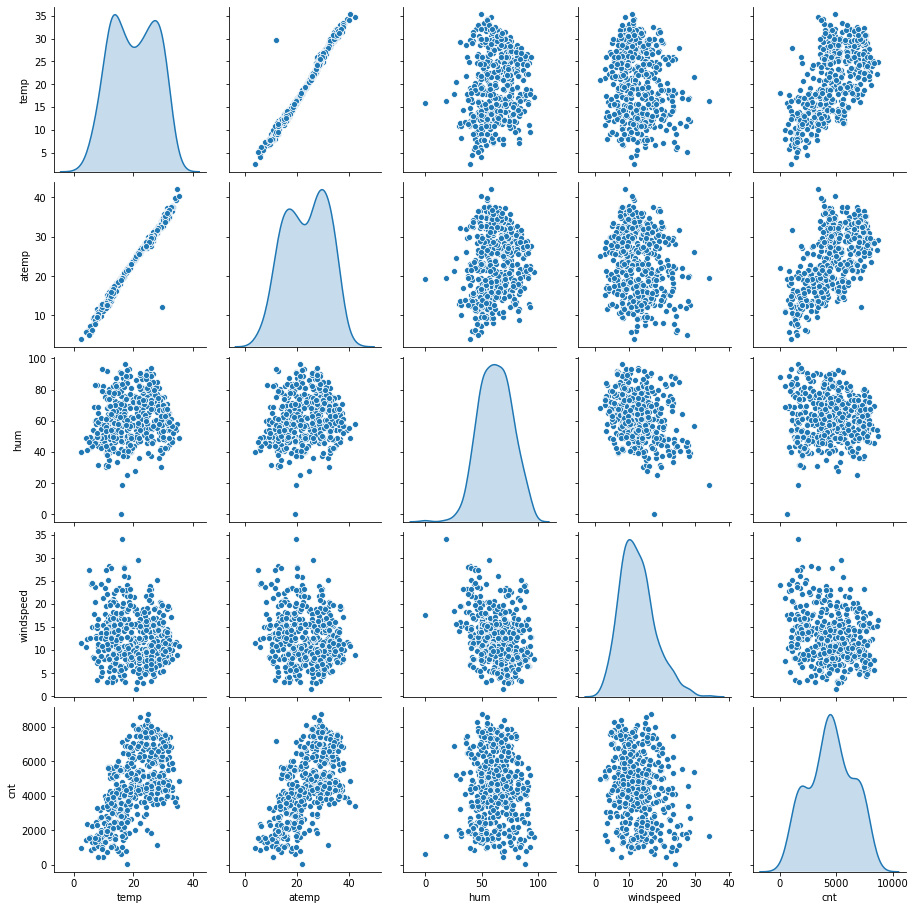

In [33]:
bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Visualising Catagorical Variables

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

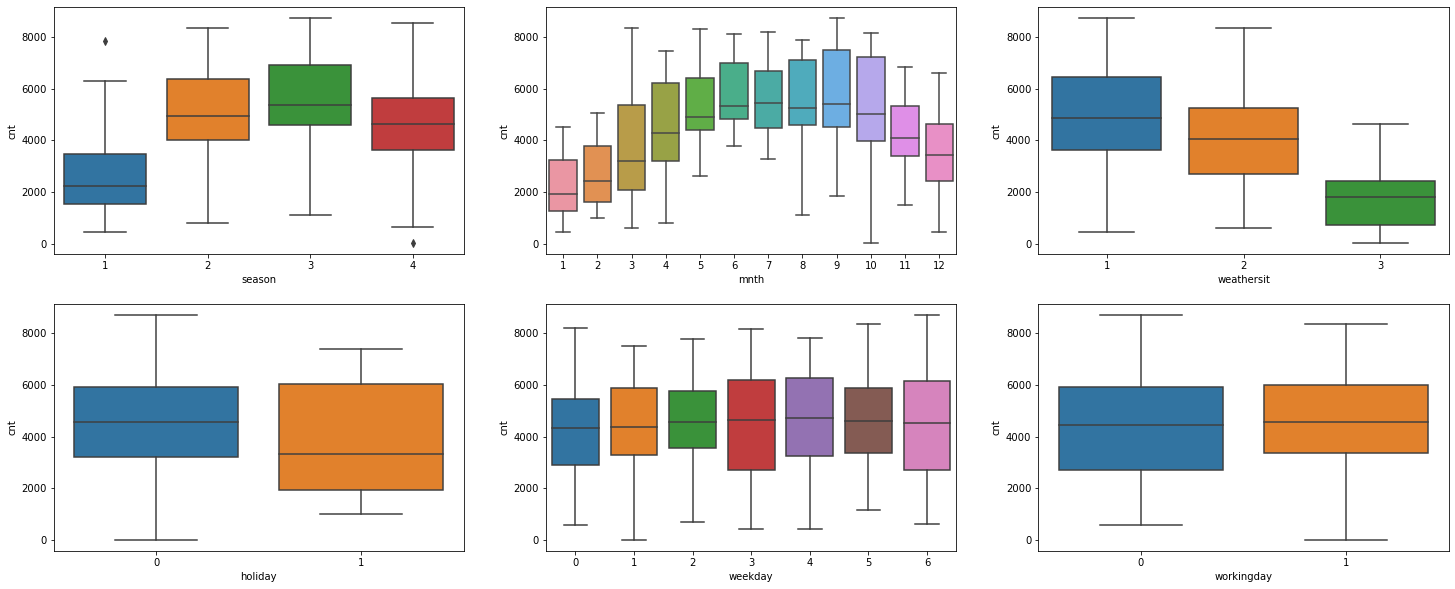

In [35]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

### Insights
There were 6 categorical variables in the dataset. 

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . 

The inference that We could derive were: 
- **season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- **mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- **holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Correlation Matrix

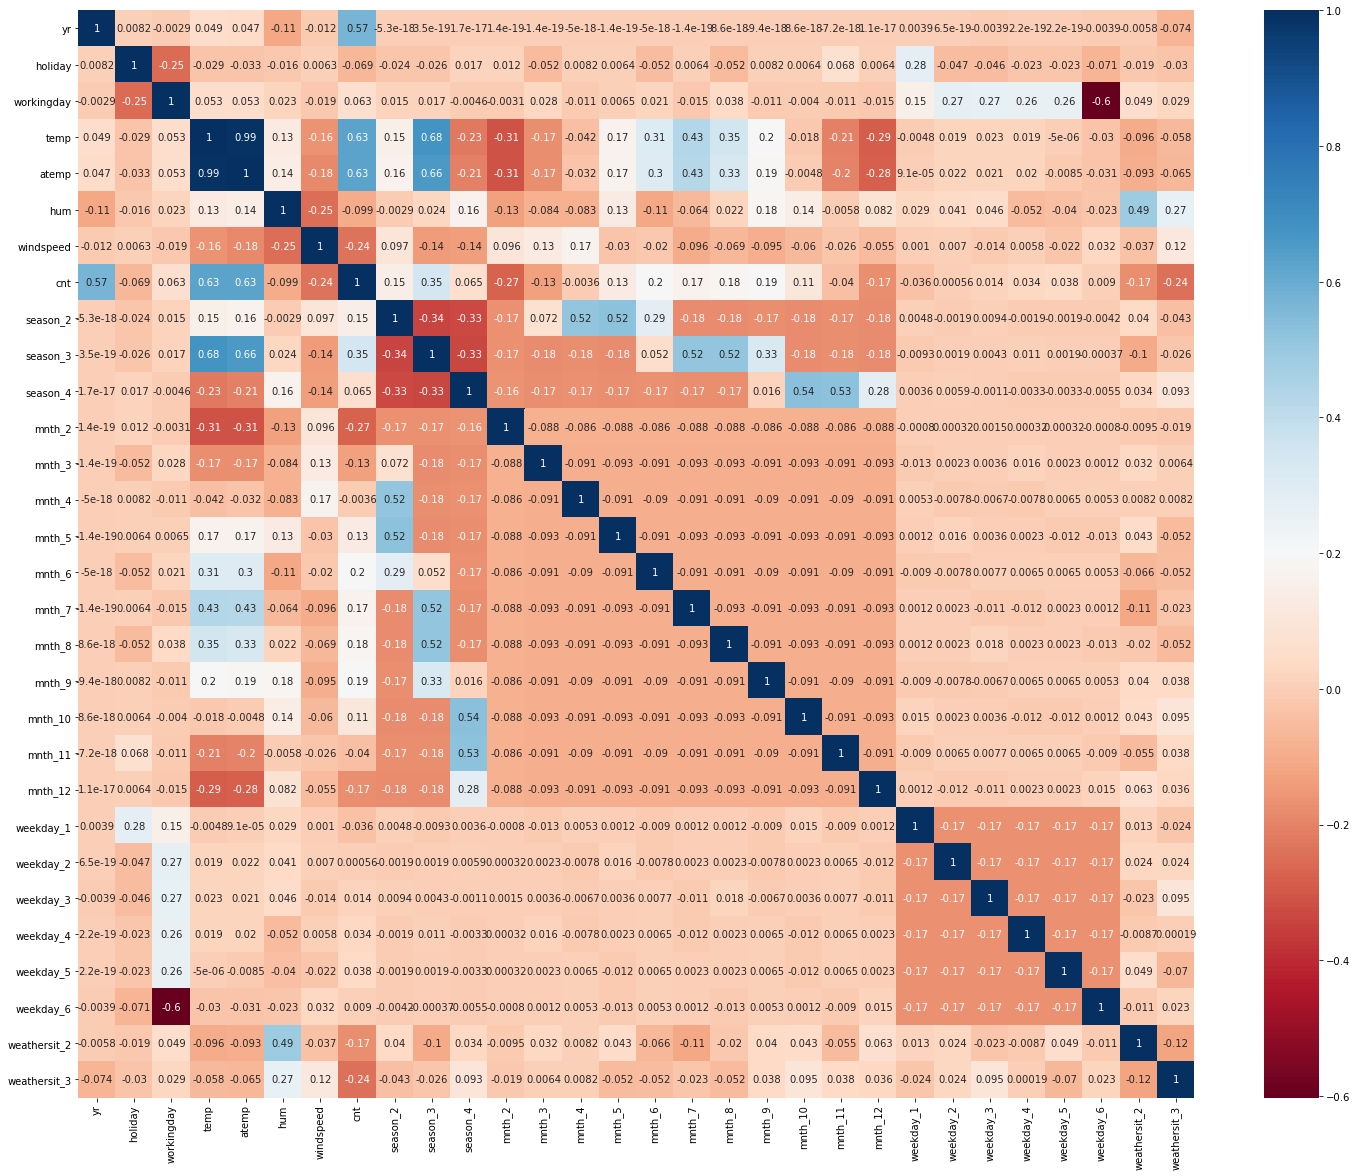

In [36]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights:
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# RESCALING THE FEATURES

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
df_train.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
483   1        0           0  18.791653  22.50605  58.7083   7.832836  6304   
650   1        0           0  16.126653  19.56980  49.4583   9.791514  7109   
212   0        0           1  31.638347  35.16460  55.0833  10.500039  4266   
714   1        0           0  14.862500  18.49690  83.8750   6.749714  3786   
8     0        0           0   5.671653   5.80875  43.4167  24.250650   822   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
483         1         0  ...        0        0          0          0   
650         0         0  ...        0        0          0          0   
212         0         1  ...        0        0          1          0   
714         0         0  ...        0        1          0          0   
8           0         0  ...        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
483          0          0          0          0             0             0  
650          0          0          0          1             0             0  
212          0          0          0          0             0             0  
714          0          0          0          0             1             0  
8            0          0          0          0             0             0  

[5 rows x 30 columns]

In [40]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [41]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
483   1        0           0  0.497426  0.487055  0.609956   0.194850   
650   1        0           0  0.416433  0.409971  0.513852   0.255118   
212   0        0           1  0.887856  0.819376  0.572294   0.276919   
714   1        0           0  0.378013  0.381804  0.871429   0.161523   
8     0        0           0  0.098690  0.048706  0.451083   0.700017   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
483  0.722734         1         0  ...        0        0          0   
650  0.815347         0         0  ...        0        0          0   
212  0.488265         0         1  ...        0        0          1   
714  0.433042         0         0  ...        0        1          0   
8    0.092039         0         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
483          0          0          0          0          0             0   
650          0          0          0          0          1             0   
212          0          0          0          0          0             0   
714          0          0          0          0          0             1   
8            0          0          0          0          0             0   

     weathersit_3  
483             0  
650             0  
212             0  
714             0  
8               0  

[5 rows x 30 columns]

In [1]:
df_train.describe()

NameError: name 'df_train' is not defined

# BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 6),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [49]:
X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'

## Model 1

### VIF Check

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2           temp  384.22
3          atemp  363.12
4            hum   17.52
7       season_3    7.09
5      windspeed    4.71
1     workingday    4.61
6       season_2    3.54
8       season_4    3.01
13  weathersit_2    2.14
0             yr    2.02
12     weekday_6    1.80
11       mnth_10    1.66
10        mnth_9    1.28
9         mnth_3    1.20
14  weathersit_3    1.17

In [51]:
import statsmodels.api as sm

X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [52]:
lr1.params

const           0.195340
yr              0.228741
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
season_2        0.130228
season_3        0.079599
season_4        0.153475
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
weekday_6       0.054618
weathersit_2   -0.047472
weathersit_3   -0.271174
dtype: float64

In [53]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.28e-186
Time:                        14:05:49   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

## Model 2

- Removing the variable 'atemp' based on its High p-value & High VIF

In [59]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

### VIF Check

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  23.21
3            hum  17.23
6       season_3   7.01
1     workingday   4.60
4      windspeed   4.55
5       season_2   3.54
7       season_4   3.01
12  weathersit_2   2.14
0             yr   2.02
11     weekday_6   1.79
10       mnth_10   1.66
9         mnth_9   1.28
8         mnth_3   1.20
13  weathersit_3   1.17

In [61]:
X_train_lm2 = sm.add_constant(X_train_new)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [62]:
lr2.params

const           0.196221
yr              0.228723
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64

In [63]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.00e-187
Time:                        14:07:21   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

## Model 3

In [64]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  16.81
5       season_3   6.75
3      windspeed   4.27
1     workingday   4.11
4       season_2   3.51
6       season_4   2.89
0             yr   2.02
9        mnth_10   1.66
10     weekday_6   1.66
11  weathersit_2   1.54
8         mnth_9   1.27
7         mnth_3   1.20
12  weathersit_3   1.08

In [66]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [67]:
lr3.params

const           0.091594
yr              0.233129
workingday      0.042443
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64

In [68]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          4.52e-184
Time:                        14:07:27   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509   

## Model 4

In [69]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

### VIF Check

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  4.92
3      windspeed  4.15
1     workingday  4.07
0             yr  2.01
5       season_4  1.98
9      weekday_6  1.66
8        mnth_10  1.63
4       season_2  1.56
10  weathersit_2  1.54
7         mnth_9  1.23
6         mnth_3  1.15
11  weathersit_3  1.08

In [71]:
X_train_lm4 = sm.add_constant(X_train_new)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [72]:
lr4.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

In [73]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.56e-181
Time:                        14:07:36   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

## Model 5

- Removing the variable 'mnth_10' based on its Very High p-value.

In [74]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

### VIF Check

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  4.80
3      windspeed  4.11
1     workingday  4.07
0             yr  2.00
8      weekday_6  1.66
4       season_2  1.56
9   weathersit_2  1.53
5       season_4  1.41
7         mnth_9  1.20
6         mnth_3  1.15
10  weathersit_3  1.07

In [76]:
X_train_lm5 = sm.add_constant(X_train_new)

lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [77]:
lr5.params

const           0.074194
yr              0.230191
workingday      0.042294
temp            0.575607
windspeed      -0.156154
season_2        0.082553
season_4        0.134820
mnth_3          0.044834
mnth_9          0.096439
weekday_6       0.057422
weathersit_2   -0.075711
weathersit_3   -0.311216
dtype: float64

In [78]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.39e-181
Time:                        14:07:39   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0742      0.020      3.640   

## Model 6

- Removing the variable 'mnth_3' based on its High 'p-value'.

In [79]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

### VIF Check

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  4.72
3     windspeed  4.02
1    workingday  4.01
0            yr  2.00
7     weekday_6  1.65
4      season_2  1.56
8  weathersit_2  1.52
5      season_4  1.38
6        mnth_9  1.20
9  weathersit_3  1.07

In [81]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [82]:
lr6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

In [83]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          3.77e-181
Time:                        14:07:42   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

### Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr6 model coefficient values

- const 0.084143
- yr 0.230846
- workingday 0.043203
- temp 0.563615
- windspeed -0.155191
- season_2 0.082706
- season_4 0.128744
- mnth_9 0.094743
- weekday_6 0.056909
- weathersit_2 -0.074807
- weathersit_3 -0.306992

# ASSUMPTIONS 

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [84]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

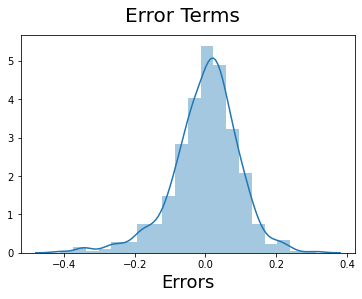

In [85]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

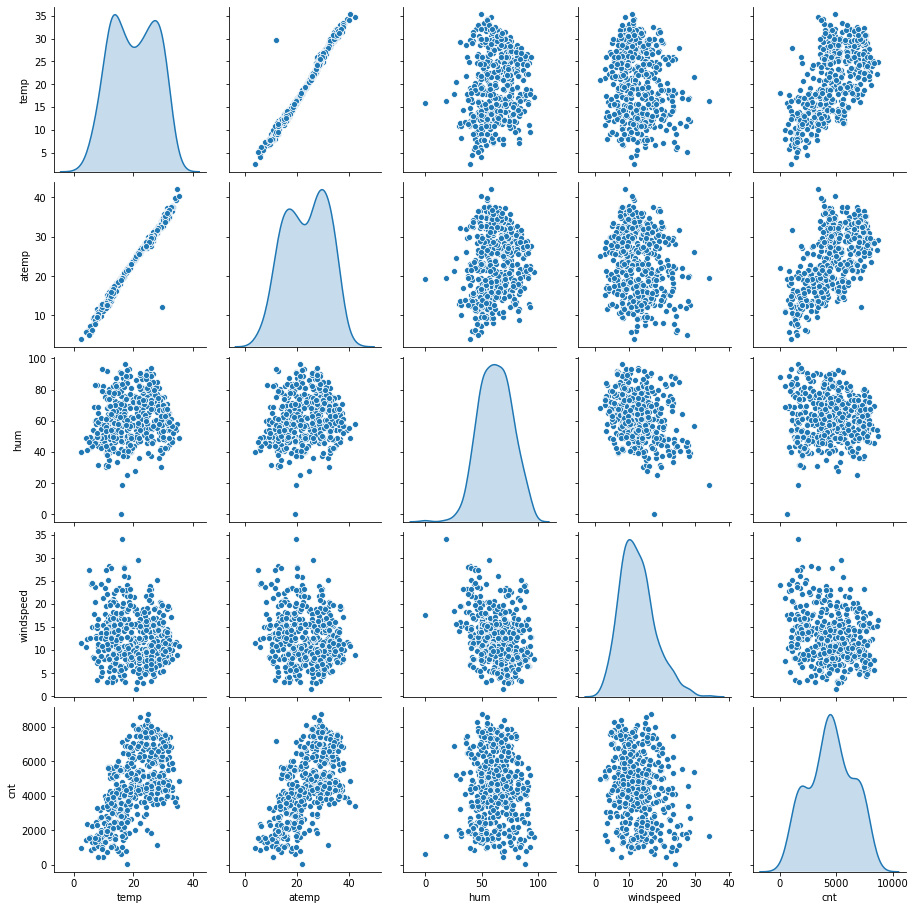

In [86]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  4.72
3     windspeed  4.02
1    workingday  4.01
0            yr  2.00
7     weekday_6  1.65
4      season_2  1.56
8  weathersit_2  1.52
5      season_4  1.38
6        mnth_9  1.20
9  weathersit_3  1.07

# MAKING PREDICTION USING FINAL MODEL

### Applying the scaling on the test sets

In [88]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [89]:
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
22    0        0           0  0.046591  0.025950  0.453529   0.462217   
468   1        0           0  0.543115  0.536771  0.522511   0.347424   
553   1        0           0  0.951196  0.933712  0.596104   0.212829   
504   1        0           0  0.699909  0.662746  0.551083   0.478229   
353   0        0           1  0.407087  0.416610  0.618615   0.080770   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
22   0.110907         0         0  ...        0        0          0   
468  0.855729         1         0  ...        0        0          0   
553  0.534975         0         1  ...        0        0          0   
504  0.817648         1         0  ...        0        0          0   
353  0.428900         0         0  ...        0        1          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
22           0          0          0          0          0             0   
468          0          0          0          0          1             0   
553          0          0          0          0          0             0   
504          0          0          0          0          0             0   
353          1          0          0          0          0             1   

     weathersit_3  
22              0  
468             0  
553             0  
504             0  
353             0  

[5 rows x 30 columns]

In [90]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.493151    0.041096    0.684932    0.551225    0.527528    0.662567   
std      0.501098    0.198967    0.465607    0.229463    0.215434    0.143562   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.301299   
25%      0.000000    0.000000    0.000000    0.356479    0.348019    0.553031   
50%      0.000000    0.000000    1.000000    0.557653    0.549198    0.662338   
75%      1.000000    0.000000    1.000000    0.751309    0.709163    0.762338   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.010390   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.346706    0.518889    0.264840    0.246575  ...    0.073059   
std      0.159553    0.219953    0.442259    0.432005  ...    0.260830   
min      0.073090    0.055683    0.000000    0.000000  ...    0.000000   
25%      0.232689    0.364703    0.000000    0.000000  ...    0.000000   
50%      0.328208    0.525771    0.000000    0.000000  ...    0.000000   
75%      0.435708    0.676887    1.000000    0.000000  ...    0.000000   
max      0.824380    0.963300    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.105023    0.155251    0.146119    0.118721    0.173516    0.132420   
std      0.307285    0.362974    0.354034    0.324202    0.379560    0.339723   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  219.000000    219.000000    219.000000  
mean     0.127854      0.324201      0.036530  
std      0.334692      0.469148      0.188034  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

### Dividing into X_test and y_test

In [91]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [92]:
col1=X_train_new.columns
X_test=X_test[col1]
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [93]:
y_pred = lr6.predict(X_test_lm6)

# MODEL EVALUATION

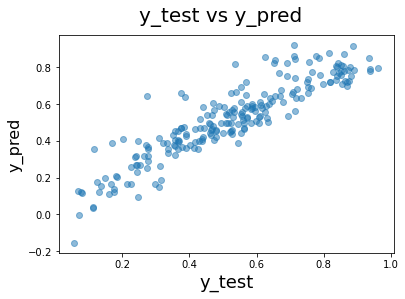

In [94]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8203092200749708

## Adjusted R^2 Value for TEST

In [96]:
r2=0.8203092200749708

In [97]:
X_test.shape


(219, 10)

In [98]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8116702402708829

# FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units. 
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.
- **Year (yr)** - A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **season_4:** - A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units. 
- **windspeed:** - A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units. 

 #### NOTE: 
 - The details of weathersit_1 & weathersit_3 
 - **weathersit_1:** Clear, Few clouds, Partly cloudy, Partly cloudy
 - **weathersit_3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
 
 
 The details of season1 & season4 
 - **season1:** spring 
 - **season4:** winter